In [1]:
from find_and_judge import *

[[array([40.62978816,  6.89088736]), array([5.62091465, 7.62376484]), array([15.86732471,  9.87793171]), array([52.38277645, 12.63408572]), array([32.12385447, 13.14043337]), array([22.123564  , 19.37512721]), array([ 4.37297915, 27.63108288]), array([19.61835019, 47.62931428]), array([30.13464096, 52.10956261]), array([51.13021505, 58.87742762])]]
10


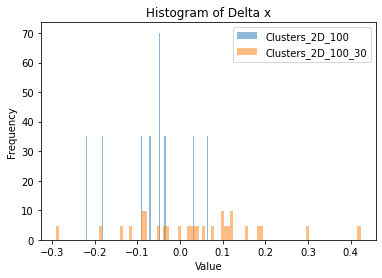

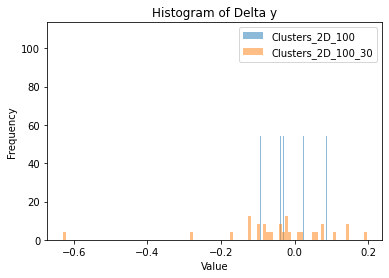

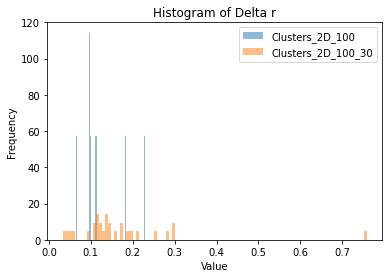

In [2]:
'''
    algorithms: 'local maxima', 'local maxima denoised', 'hr local maxima denoised'
'''
images = read_in_data('./Clusters_2D_100.txt')
found = find_points(images, 'hr local maxima denoised', 1)
print(found)
print(len(found[0]))
result1 = judge(images, found)
images_30 = read_in_data('./Clusters_2D_100_30.txt')
found_30 = find_points(images_30, 'hr local maxima denoised', 1)
result2 = judge(images_30, found_30)
                                    
# Plot the histograms with specified border colors and transparent fills
plt.hist(result1.dist_array[0], bins=100, density=True, alpha=0.5, label='Clusters_2D_100')  # Histogram for data1
plt.hist(result2.dist_array[0], bins=100, density=True, alpha=0.5, label='Clusters_2D_100_30')    # Histogram for data2
# Customize the plot
plt.title('Histogram of Delta x')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(loc='upper right')  # Add a legend to differentiate the datasets
plt.show()

# Plot the histograms
plt.hist(result1.dist_array[1], bins=100, density=True, alpha=0.5, label='Clusters_2D_100')  # Histogram for data1
plt.hist(result2.dist_array[1], bins=100, density=True, alpha=0.5, label='Clusters_2D_100_30')    # Histogram for data2
# Customize the plot
plt.title('Histogram of Delta y')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(loc='upper right')  # Add a legend to differentiate the datasets
plt.show()

# Plot the histograms
plt.hist(result1.dist_array[2], bins=100, density=True, alpha=0.5, label='Clusters_2D_100')  # Histogram for data1
plt.hist(result2.dist_array[2], bins=100, density=True, alpha=0.5, label='Clusters_2D_100_30')    # Histogram for data2
# Customize the plot
plt.title('Histogram of Delta r')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(loc='upper right')  # Add a legend to differentiate the datasets
plt.show()

In [3]:
result1.show_error(images, found)